Pasar a la IA el cacho de imagen que detecta que es una cara en el X y en la Y le pasamos un número que esté asociado a cada individuo

pip install opencv-contrib-python

In [148]:
import pathlib
import cv2 as cv


path=str(pathlib.Path().resolve())

In [149]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                'haarcascade_eye.xml')

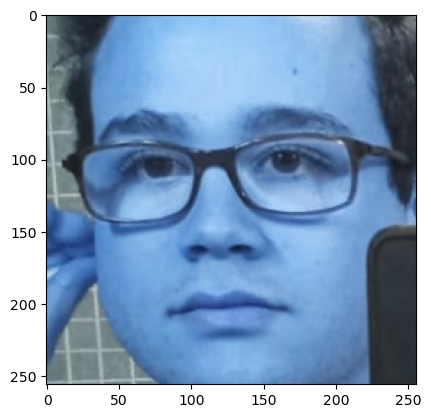

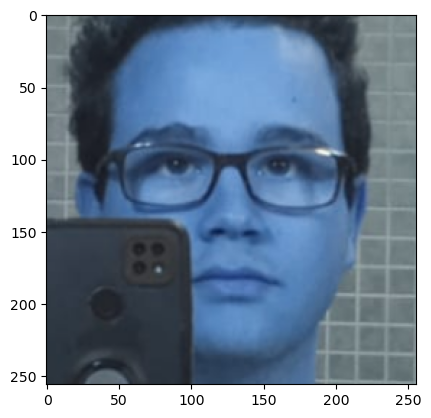

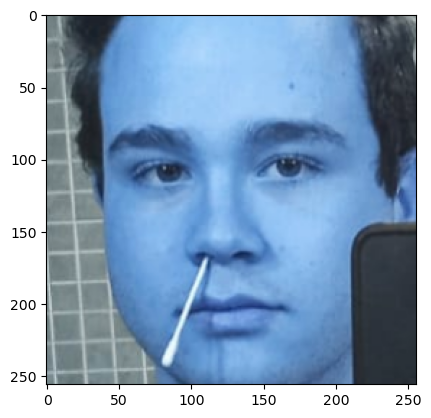

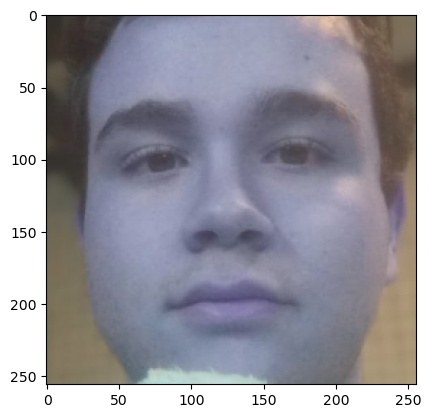

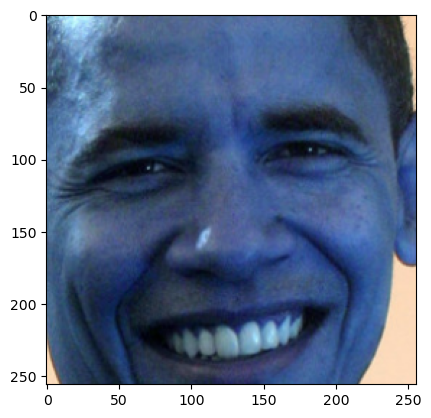

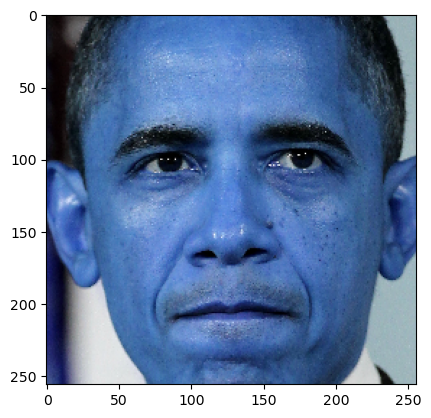

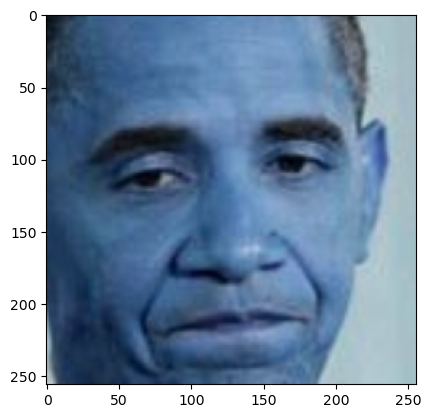

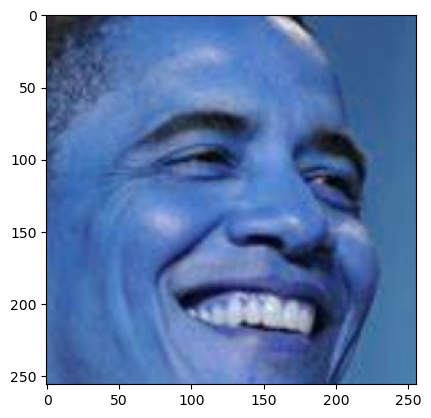

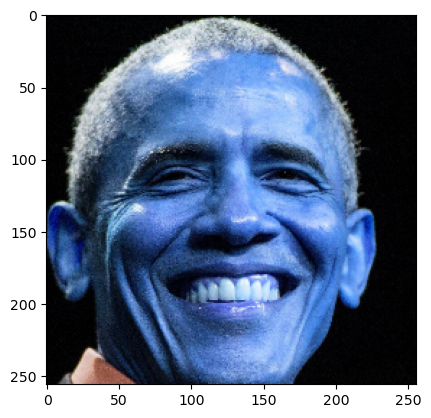

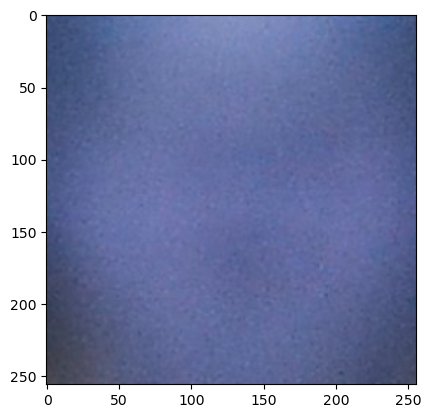

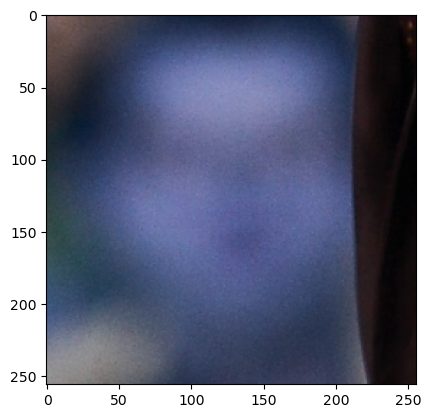

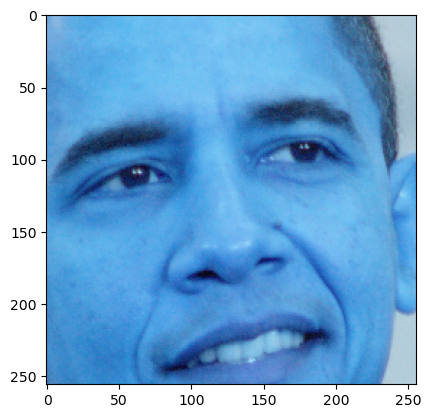

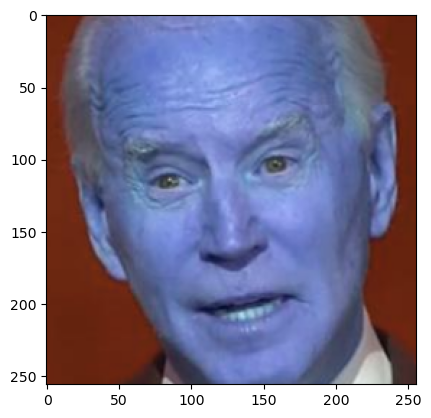

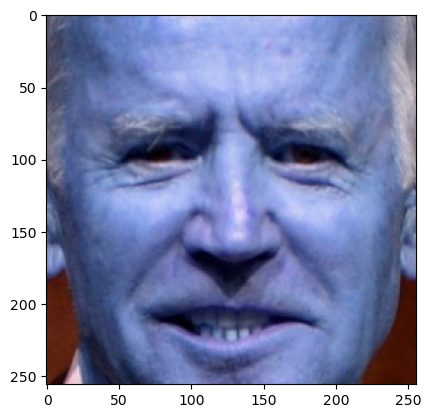

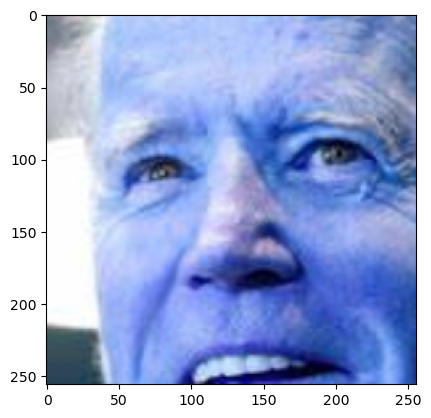

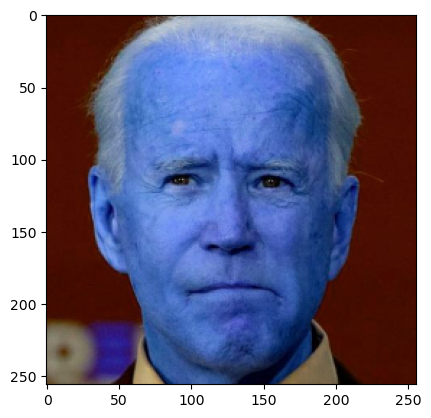

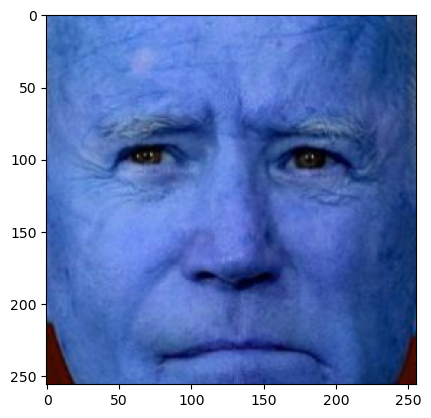

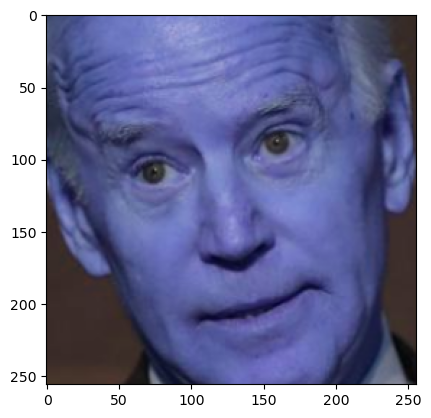

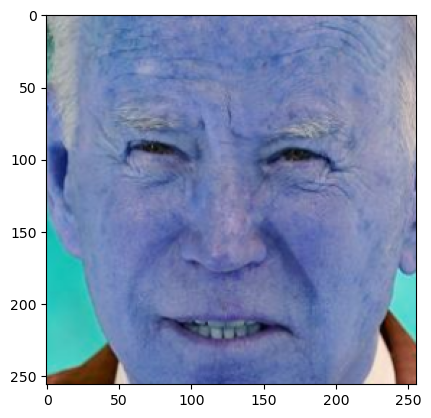

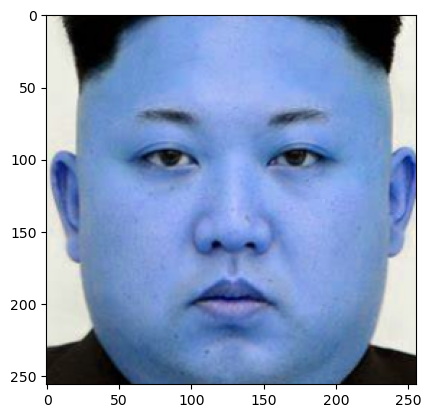

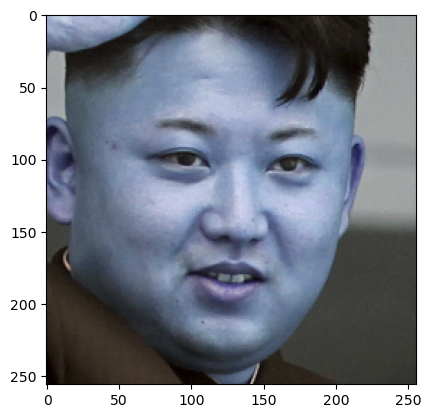

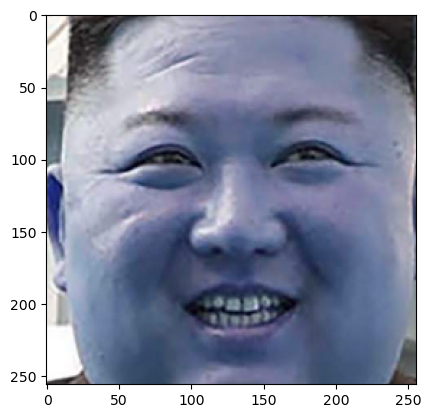

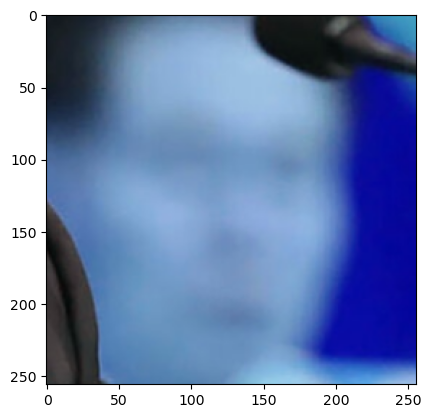

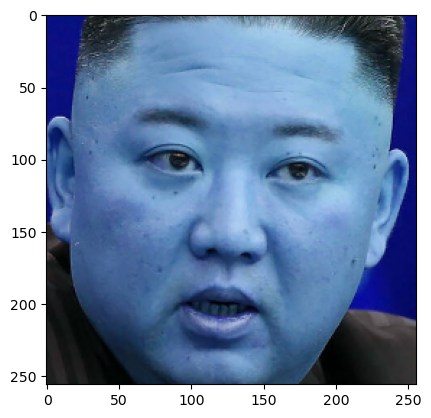

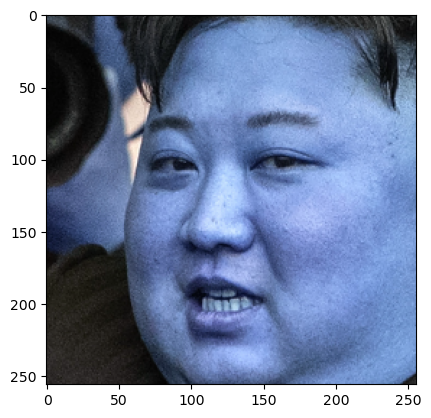

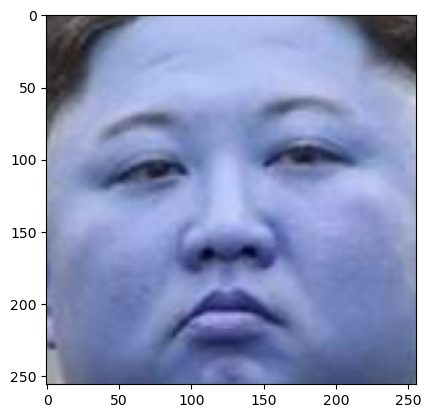

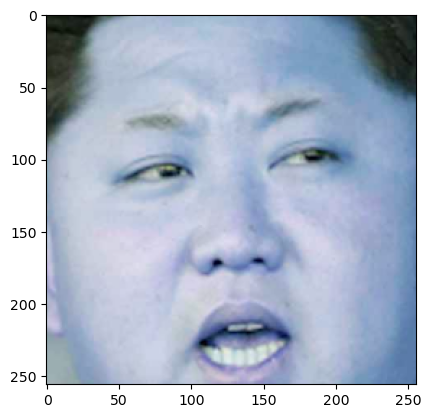

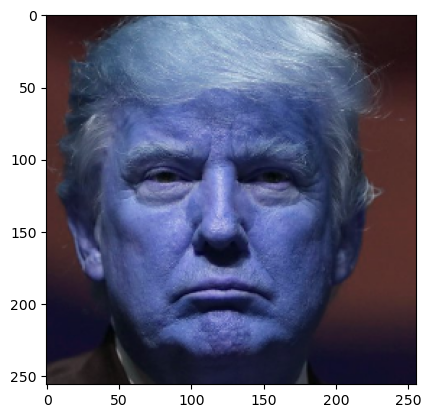

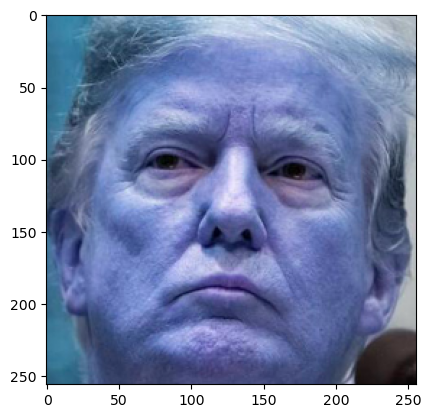

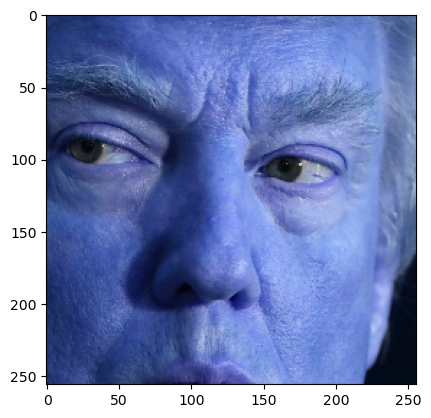

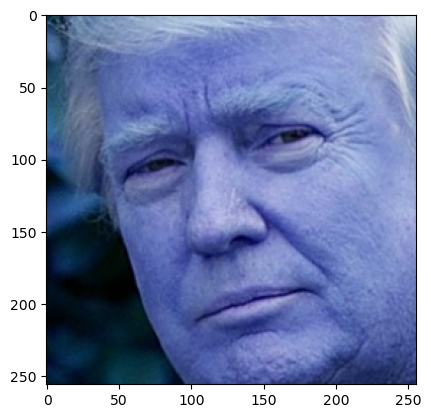

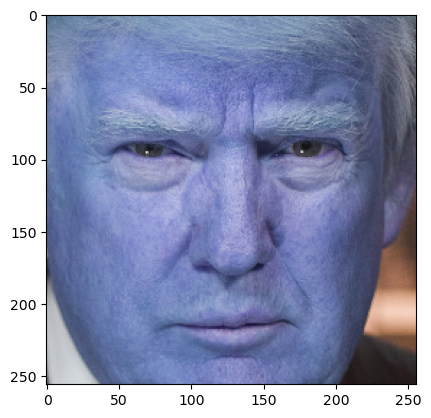

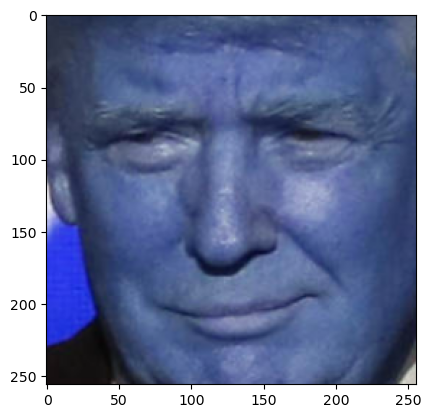

In [150]:
import os
from matplotlib import pyplot as plt
import pandas as pd


df = pd.DataFrame()
caras=[]
valores=[]
titulos=[]
for index,(dirpath, dirnames, filenames) in enumerate(os.walk(path+"/Imagenes/")):
    for filename in filenames:
        img = (cv.imread(os.path.join(dirpath, filename)))
        allcaras = face_cascade.detectMultiScale(cv.cvtColor(img,cv.COLOR_BGR2GRAY), 1.8,3,minSize=[128,128],flags=cv.CASCADE_SCALE_IMAGE)
        cop = img.copy()
        for (x,y,w,h) in allcaras:
            cara=cop[y:y+h, x:x+w]
            cara = cv.resize(cara,[256,256],cv.INTER_LINEAR)
            plt.imshow(cara)
            caras.append(cv.cvtColor(cara,cv.COLOR_BGR2GRAY))
            valores.append(index-1)
            plt.show(block=False)
    titulos = dirnames if len(dirnames)>0 else titulos

In [151]:
modelo = cv.face.LBPHFaceRecognizer_create()

In [152]:
import numpy as np


modelo.train(np.array(caras,dtype=object).astype(int),np.array(valores,dtype=int))

In [153]:
def get_image(name):
    img = cv.imread(path+name)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img=cv.resize(img,[1024,1024])
    plt.imshow(img,cmap="gray")
    return img

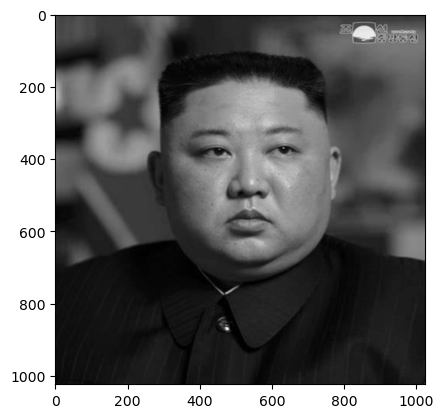

In [154]:
imgK = get_image("/adivinaKim.jpg")

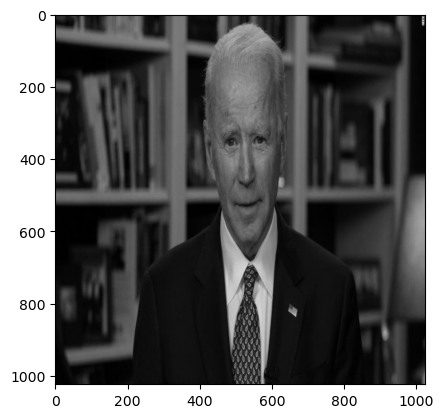

In [155]:
imgB = get_image("/adivinaBiden.jpg")

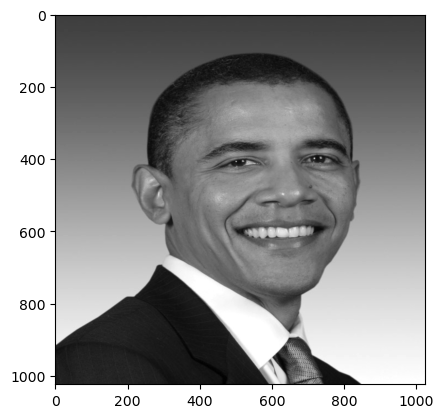

In [156]:
imgO = get_image("/adivinaObama.jpg")

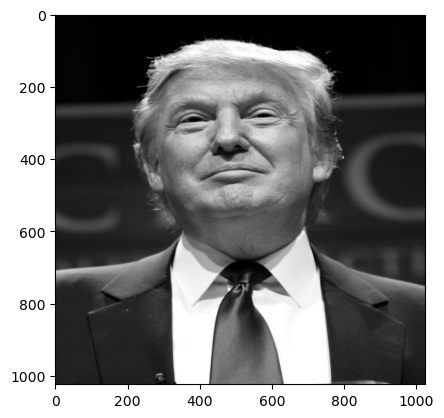

In [157]:
imgT = get_image("/adivinaTrump.jpg")

In [158]:
def predict_face(img,model,det=1.9,v=1):
    allcaras = face_cascade.detectMultiScale(img, det,v,minSize=[128,128],flags=cv.CASCADE_SCALE_IMAGE)
    cop = img.copy()
    for (x,y,w,h) in allcaras:
        cara=cop[y:y+h, x:x+w]
        cara=cv.resize(cara,[256,256],interpolation=cv.INTER_LINEAR)
        plt.imshow(cara,cmap="gray")
        plt.show(block=False)
    values=model.predict(cara)
    print(values)
    for i,v in enumerate(titulos):
        if i == values[0]:
            print(f"ES:{v}")

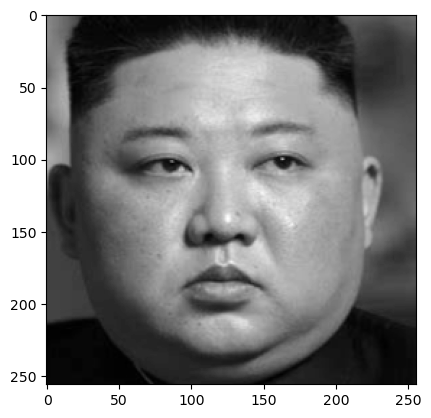

(3, 56.393387776265165)
ES:Kim


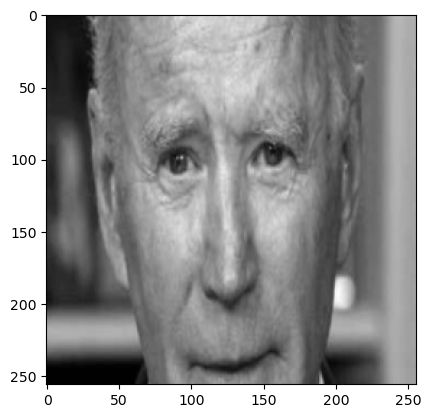

(2, 70.20854963587158)
ES:Biden


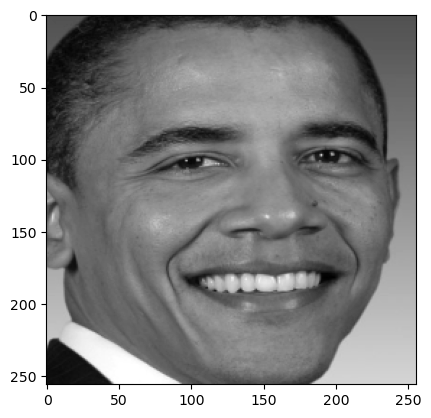

(1, 60.967462723472956)
ES:Obama


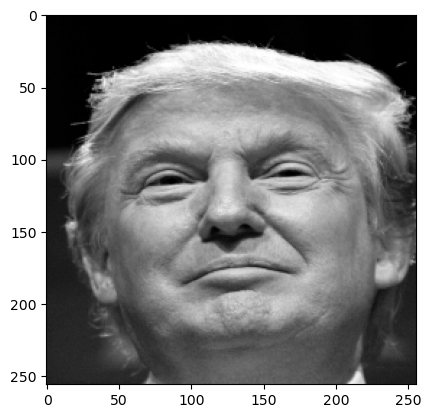

(4, 54.07268095739754)
ES:Trump


In [159]:
predict_face(imgK,modelo)
predict_face(imgB,modelo)
predict_face(imgO,modelo)
predict_face(imgT,modelo)

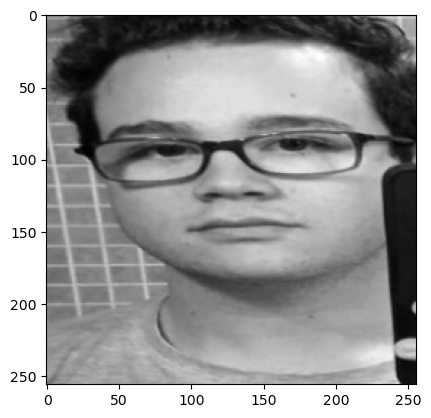

(0, 62.62574728276892)
ES:Pablo


In [160]:
predict_face(get_image("/adivinaPablo.jpg"),modelo,det=1.4,v=2)